In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# set datetime index
resampled_data = pd.read_csv("Sprint_Resampled Data.csv")
resampled_data['Date'] = resampled_data['Date'].apply(pd.to_datetime)
resampled_data = resampled_data.set_index('Date')

In [3]:
# handling missing value
test = resampled_data['1991-3': '2019-5'].dropna(axis=1)
train = test[:int(0.9*(len(test)))]
valid = test[int(0.9*(len(test))):]
resampled_data
model = VAR(endog=train)
model_fit = model.fit()
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/home/yuntong/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/home/yuntong/.local/lib/python3.6/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [4]:
test.columns
# production col 0


Index(['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)',
       'U.S. Field Production of Crude Oil (Thousand Barrels)',
       'Weekly U.S. Product Supplied of Petroleum Products  (Thousand Barrels per Day)',
       'Weekly U.S. Product Supplied of Finished Motor Gasoline  (Thousand Barrels per Day)',
       'Weekly U.S. Product Supplied of Kerosene-Type Jet Fuel  (Thousand Barrels per Day)',
       'Weekly U.S. Product Supplied of Distillate Fuel Oil  (Thousand Barrels per Day)',
       'Weekly U.S. Product Supplied of Residual Fuel Oil  (Thousand Barrels per Day)',
       'Weekly U.S. Exports of Crude Oil and Petroleum Products  (Thousand Barrels per Day)',
       'Weekly U.S. Exports of Crude Oil  (Thousand Barrels per Day)',
       'Weekly U.S. Exports of Total Petroleum Products  (Thousand Barrels per Day)',
       'Weekly U.S. Imports of Crude Oil and Petroleum Products  (Thousand Barrels per Day)',
       'Weekly U.S. Imports of Crude Oil  (Thousand Barrels per Day)',
    

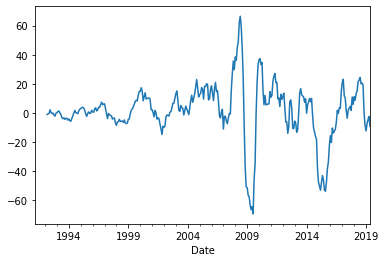

In [5]:
# remove seasonality
test['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].diff(12).plot()

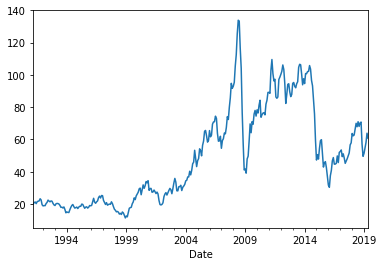

In [6]:
test['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].plot()

In [7]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[test.columns])
pred = pred.set_index(valid.index)

for j in range(0,18):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]
# for i in test.columns:
#     print('rmse value for', i, 'is : ', np.sqrt(mean_squared_error(pred[i], valid[i])))

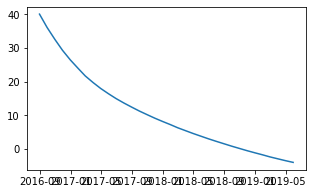

In [8]:
fig, ax = plt.subplots(figsize=(5, 3))
l1 = plt.plot(pred['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'])


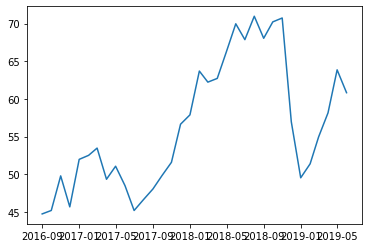

In [9]:
l2 = plt.plot(valid['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'])

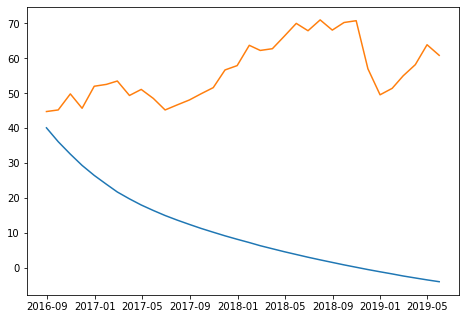

In [10]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(pred['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'], label="x**2")
ax.plot(valid['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'], label="x**3")

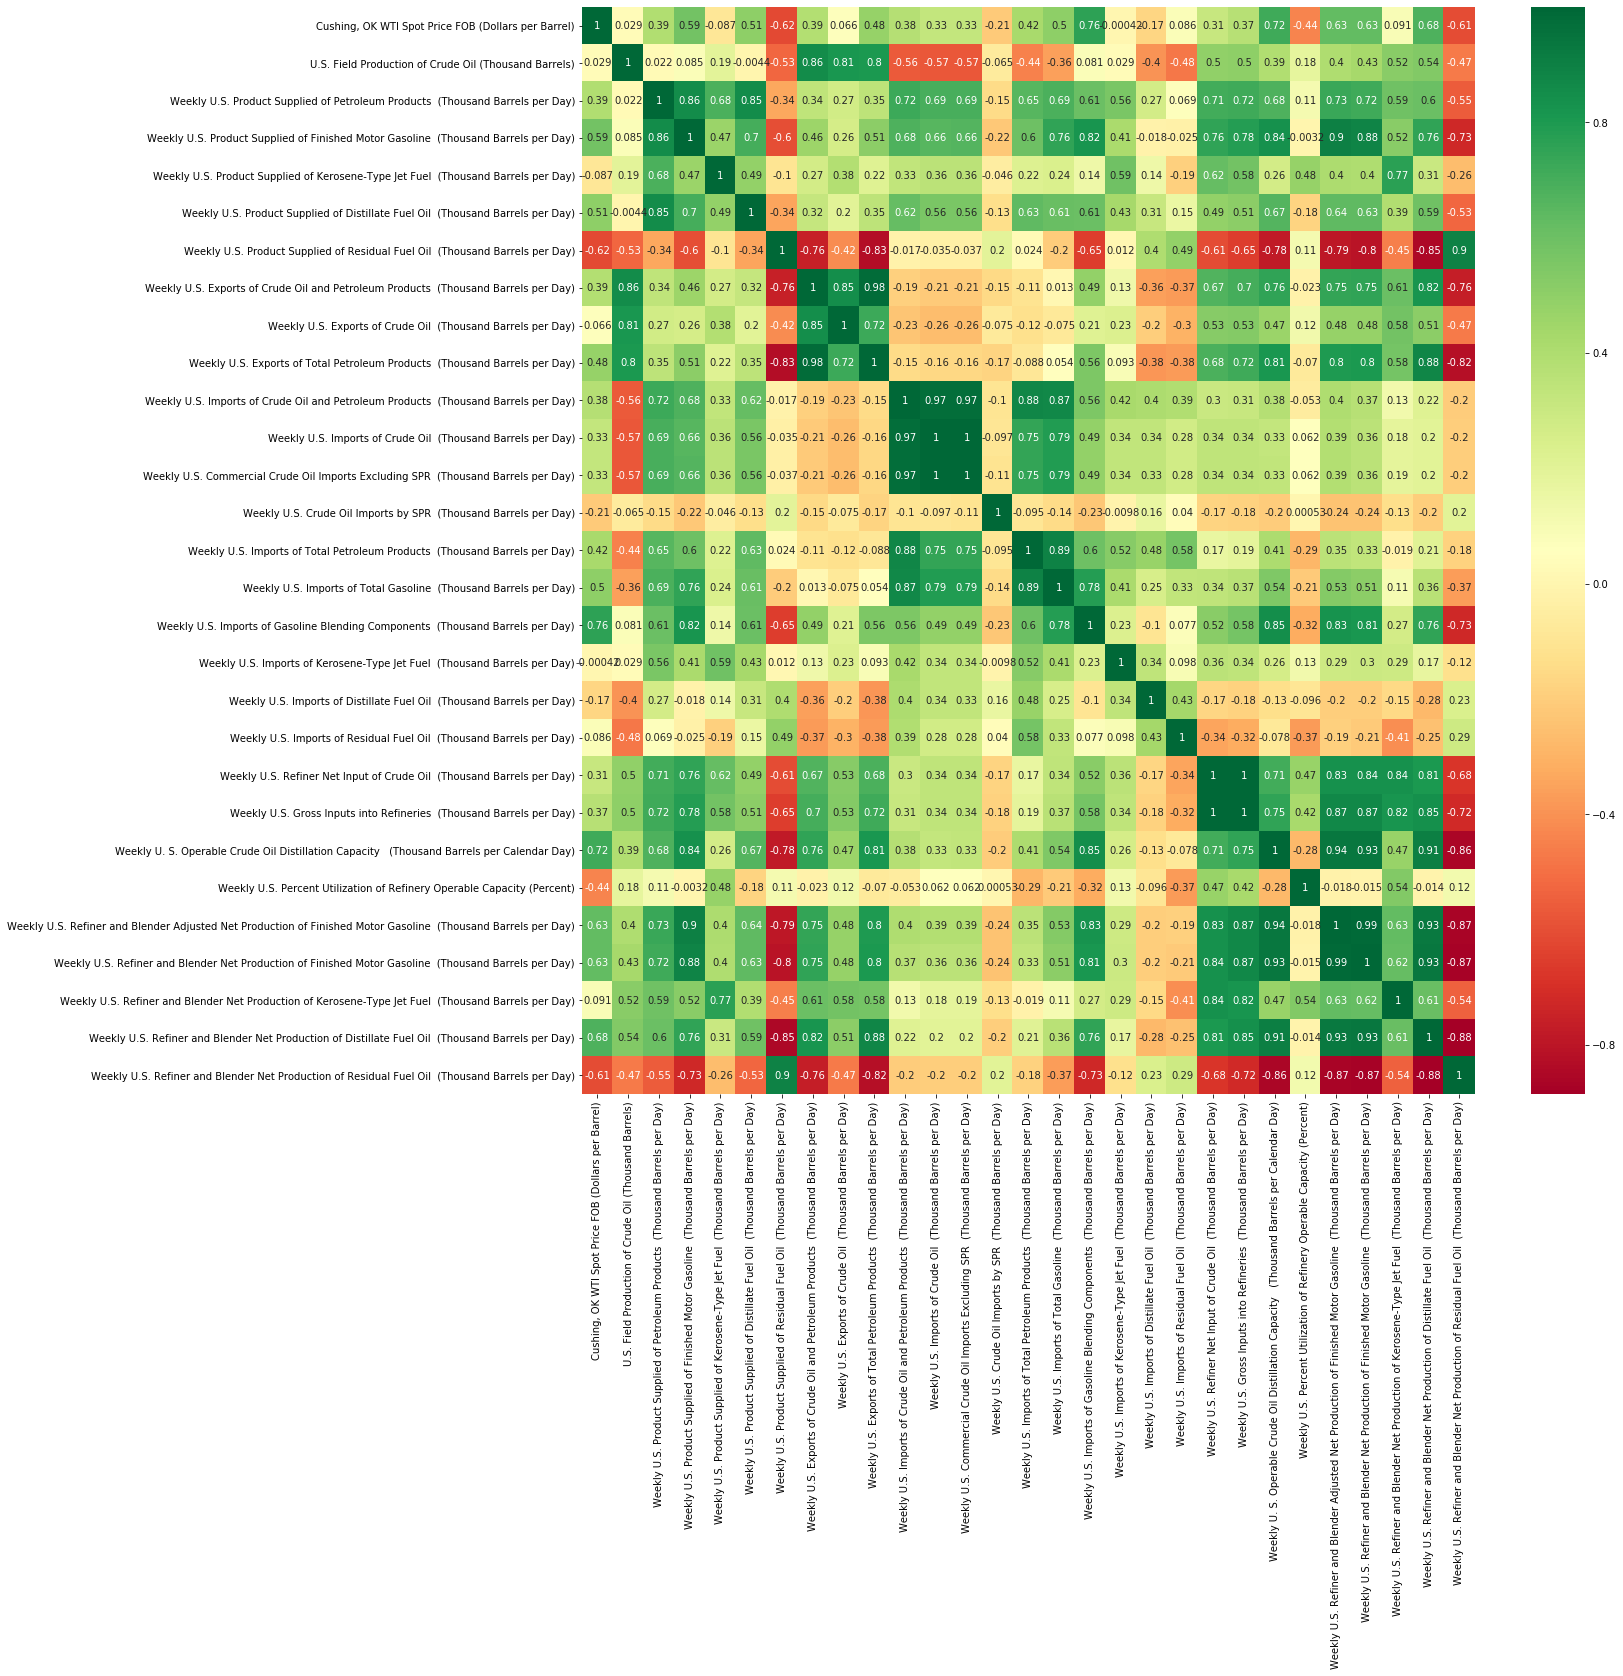

In [11]:
# feature selection 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns


model = ExtraTreesClassifier()
X = test.iloc[:,1:28]
y = test.iloc[:,0]

corrmat = test.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(test[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
# choosing parameters based on their corr
matrix = test[top_corr_features].corr()

threshold = 0.0
chosen = matrix["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"][np.absolute(matrix["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"])> threshold]
chosenCol = chosen.index
chosen

Cushing, OK WTI Spot Price FOB (Dollars per Barrel)                                                               1.000000
U.S. Field Production of Crude Oil (Thousand Barrels)                                                             0.028640
Weekly U.S. Product Supplied of Petroleum Products  (Thousand Barrels per Day)                                    0.390732
Weekly U.S. Product Supplied of Finished Motor Gasoline  (Thousand Barrels per Day)                               0.586596
Weekly U.S. Product Supplied of Kerosene-Type Jet Fuel  (Thousand Barrels per Day)                               -0.087176
Weekly U.S. Product Supplied of Distillate Fuel Oil  (Thousand Barrels per Day)                                   0.505972
Weekly U.S. Product Supplied of Residual Fuel Oil  (Thousand Barrels per Day)                                    -0.617912
Weekly U.S. Exports of Crude Oil and Petroleum Products  (Thousand Barrels per Day)                               0.388581
Weekly U.S. Expo

In [13]:
test = test[chosenCol]
test = resampled_data['1991-3': '2019-5'].dropna(axis=1)
train = test[:int(0.95*(len(test)))]
valid = test[int(0.95*(len(test))):]

model = VAR(endog=train)
model_fit = model.fit()

prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/home/yuntong/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/home/yuntong/.local/lib/python3.6/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [14]:
valid.index


DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [15]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[test.columns])
pred = pred.set_index(valid.index)

for j in range(0,18):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]
# for i in test.columns:
#     print('rmse value for', i, 'is : ', np.sqrt(mean_squared_error(pred[i], valid[i])))

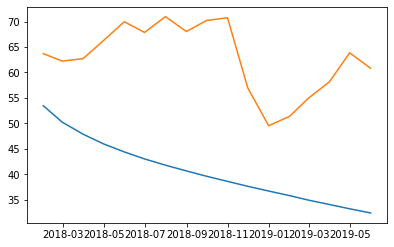

In [16]:
fig, ax = plt.subplots(figsize=(5, 3))
plt.plot(pred['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'])
plt.plot(test['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'])


ax = fig.add_axes([0,0,1,1])

ax.plot(pred['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'], label="x**2")
ax.plot(valid['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'], label="x**3")

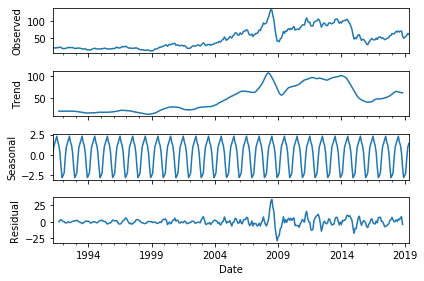

In [17]:
# detrend and remove seasonality 
from statsmodels.tsa.seasonal import seasonal_decompose
series = test['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)']
result = seasonal_decompose(series, model='additive')
result.plot()
plt.show()

AttributeError: 'DecomposeResult' object has no attribute 'Residual'

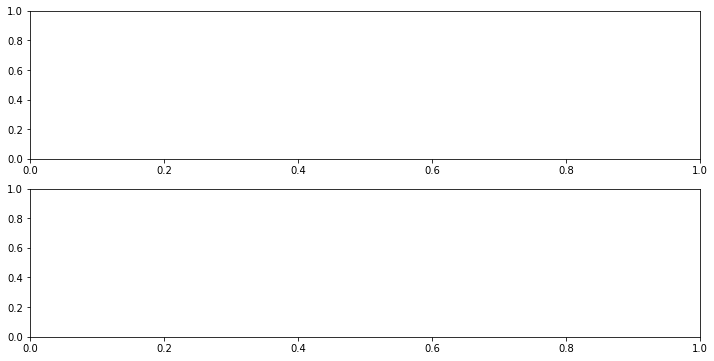

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(result.Residual, ax=ax[0], lags=20)
ax[1] = plot_pacf(series, ax=ax[1], lags=20)

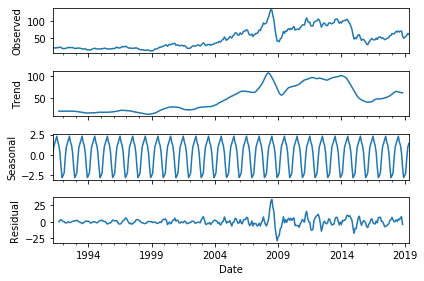

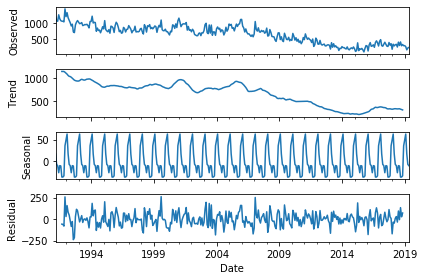

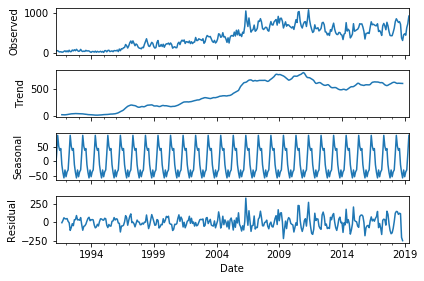

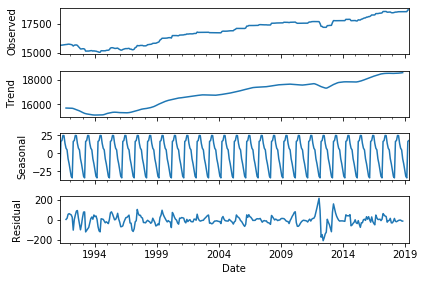

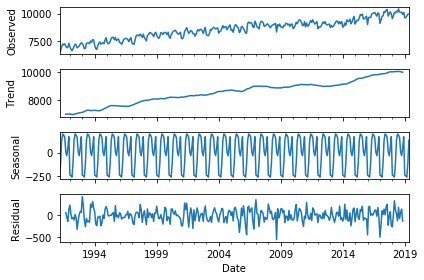

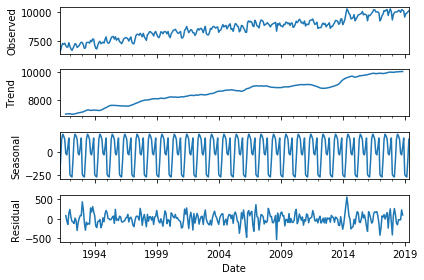

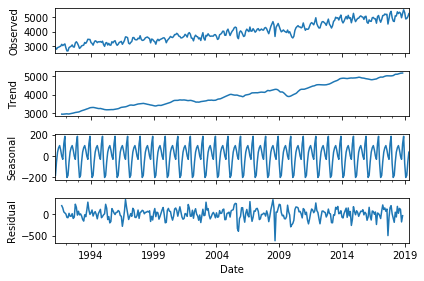

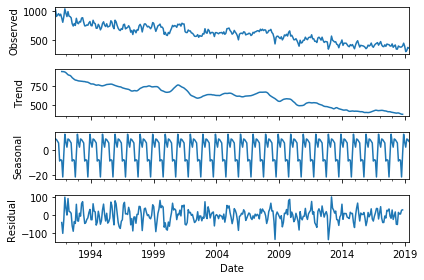

In [17]:
for col in chosenCol:
    result = seasonal_decompose(test[col],model = 'additive')
    result.plot()

In [18]:
# # VARMAX example
# from statsmodels.tsa.statespace.varmax import VARMAX
# from random import random
# # contrived dataset with dependency
# vary = train.iloc[:,0]
# varx = train.iloc[:,1:]
# # fit model
# model = VARMAX(endog=vary, order=(1, 0))
# model_fit = model.fit(disp=False)
# # make prediction
# data_exog2 = [[100]]
# yhat = model_fit.forecast(ex='Cushing, OK WTI Spot Price FOB (Dollars per Barrel)')
# print(yhat)

In [19]:

# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# contrived dataset

# fit model
# model = ExponentialSmoothing(test)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(valid), len(valid))
print(yhat)

AttributeError: 'VARResults' object has no attribute 'predict'

In [ ]:

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# X = test.iloc[:,1:10]
# y = test.iloc[:,0]
# #apply SelectKBest class to extract top 10 best features
# bestfeatures = SelectKBest(score_func=chi2, k=4)
# fit = bestfeatures.fit(X,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(10,'Score'))  #print 10 best features

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# X = test.iloc[:,1:28]
# y = test.iloc[:,0]
# clf = RandomForestClassifier()
# clf.fit(X, y)
# importance = pd.Series(clf.feature_importances_)
# importance.sort_values(ascending=False)
# print(importance)